**Data Cleanning**

In [342]:
#Import all relevant libraries
import pandas as pd
import numpy as np

In [343]:
#read in data into pandas dataframe
data = pd.read_csv('school1.csv')
data.head()

,student_id,school,term,academicriskscore,engagementriskscore,financialriskscore,beliefriskscore,overallriskscore,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,...,engagement,financial,wellness,response_created,wheniwasinhighschool,ifihaveanissue,myparentsrelativessupportmefina,istruggletopayfortextbooks,year,returnedfall2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,1.0,fall 2018,2.0,12.0,4.0,0.0,18.0,Because it is close to work/home,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,spring 2019,2.0,12.0,4.0,0.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
#drop dropout and rename s19 dropout
data = data.drop('dropout', 1)

In [345]:
data.rename(columns = {'s19_dropout':'dropout'}, inplace = True) 

In [346]:
#Drop variables
variables_to_drop = ['academicriskscore', 'engagementriskscore', 'financialriskscore', 'beliefriskscore',
                     'overallriskscore', 'wellnessriskscore', 'id', 'ethnic_group_tr', 
                     'residency', 'citizenship', 'um_acad_prog1', 'um_acad_plan1', 'actcomposite', 
                     'hispanic', 'nonresalien', 'americanindian', 'asian', 'black', 'pacific', 'white',
                     'actionrsn', 'advisor', 'sport', 'eligterm', 'overallrisk', 'academic', 'engagement',
                     'financial', 'wellness', 'response_created', 'year', 'returnedfall2019',  'f18_dropout', 
                     'returnedfall2019','withwhatgenderdoyouidentify',"pleasespecifyyourraceethnicity","student_id"]


data = data.drop(variables_to_drop, 1)

In [347]:
#Drop students with no survey responses
data = data.dropna(subset=['doyouliveoncampus'])
data.shape[0]

794

In [348]:
#check how many dropouts we have and replace missing values with 0
data['dropout'] = data['dropout'].fillna(0)
data['dropout'].value_counts()

0.0    650
1.0    144
Name: dropout, dtype: int64

In [307]:
#Check if we have dropouts for each school
data[['school', 'dropout']].groupby(['school']).agg(['mean', 'std', 'count'])

dropout                
           mean       std count
school                         
1.0     0.18136  0.385559   794

In [308]:
#Check if we have dropouts for each term
data[['term', 'dropout']].groupby(['term']).agg(['mean', 'std', 'count'])

dropout                
                mean       std count
term                                
fall 2018    0.18136  0.385803   397
spring 2019  0.18136  0.385803   397

In [309]:
#Create two columns for semseter and a year and drop original term variable and convert the semester to float
data[['Semester','Year']] = data.term.str.split(expand=True) 
data = data.drop('term',1)
data['Semester'] = (data['Semester'] == 'spring').astype(float)
data.head()

,school,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,doyouliveoncampus,doyouhaveanymajorfamilycommitmen,haveyoumetwithyouradvisororhavea,howlikelyareyoutorecommendyourun,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,...,whichofthefollowingbestdescribes,doyouhavechildren,areyouanathlete,dropout,wheniwasinhighschool,ifihaveanissue,myparentsrelativessupportmefina,istruggletopayfortextbooks,Semester,Year
1,1.0,Because it is close to work/home,No,No,No,Yes,10.0,Agree,Disagree,Disagree,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2018
3,1.0,NaN,NaN,No,No,Yes,10.0,Agree,Somewhat agree,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,2019
5,1.0,Other,Yes,Yes,No,No,7.0,Somewhat Agree,Disagree,Disagree,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,2018
7,1.0,NaN,NaN,Yes,No,Yes,6.0,Somewhat agree,Disagree,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2019
9,1.0,Because it is close to work/home,No,Yes,No,Yes,7.0,Strongly Agree,Somewhat Agree,Somewhat Agree,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2018


In [310]:
#Drop empty columns
data = data.dropna(how='all', axis=1)

In [311]:
data.columns

Index(['school', 'whydidyouchoosethisschool',
       'areyouthefirstpersoninyourfamily', 'doyouliveoncampus',
       'doyouhaveanymajorfamilycommitmen', 'haveyoumetwithyouradvisororhavea',
       'howlikelyareyoutorecommendyourun', 'iaminterestedinthecoursesthatiam',
       'mycourseloadistoochallenging', 'iamscaredoffailingoneormoreofmyc',
       'thecoursesthatiamtakingwillhelpm', 'iamconfidentthatiwillgraduateint',
       'myparentsrelativessupportmefinan', 'istruggletopayfortextbooksrentut',
       'iworryalotaboutpayingforschool', 'iwouldbenefitfromhelpmanagingmyf',
       'balancingworkandschoolistoostres', 'iamconsideringtakingabreakfromsc',
       'ifeellikeifitintomyschool', 'ifihaveanissueihavesomeonetoreac',
       'ioftenattendeventsorganizedbyacl', 'partyinggetsinthewayofmedoingwel',
       'wheniwasinhighschoolialwaysknewi', 'ibelievethatacollegedegreeisvalu',
       'didyoufailoneormoreofyourcourses', 'iamscaredoffailingmorethanoneofm',
       'iampayingforcollegeoutofpo

In [312]:
#Combine similar Questions
data.iamscaredoffailingoneormoreofmyc = np.where(data.iamscaredoffailingoneormoreofmyc.isnull(), data.iamscaredoffailingmorethanoneofm, data.iamscaredoffailingoneormoreofmyc)
data = data.drop('iamscaredoffailingmorethanoneofm',1)
data.mysociallifegetsinthewayofmedoin = np.where(data.mysociallifegetsinthewayofmedoin.isnull(),data.partyinggetsinthewayofmedoingwel , data.mysociallifegetsinthewayofmedoin)
data = data.drop('partyinggetsinthewayofmedoingwel',1)


In [313]:
#Create a list of lakert scale and one_hot variables
lakirt = ['iaminterestedinthecoursesthatiam', 'mycourseloadistoochallenging', 'iamscaredoffailingoneormoreofmyc',
          'thecoursesthatiamtakingwillhelpm', 'iamconfidentthatiwillgraduateint', 'myparentsrelativessupportmefinan',
          'istruggletopayfortextbooksrentut', 'iworryalotaboutpayingforschool', 'iwouldbenefitfromhelpmanagingmyf',
          'iamconsideringtakingabreakfromsc', 'ifeellikeifitintomyschool', 'ifihaveanissueihavesomeonetoreac',
          'ioftenattendeventsorganizedbyacl', 'wheniwasinhighschoolialwaysknewi',
          'ibelievethatacollegedegreeisvalu', 'iwasexcitedtoseemyfriendswhenica', 'mysociallifegetsinthewayofmedoin',
        
          ]

one_hot = ['whydidyouchoosethisschool', 'areyouthefirstpersoninyourfamily', 
           'doyouliveoncampus', 'doyouhaveanymajorfamilycommitmen', 'haveyoumetwithyouradvisororhavea', 
            'didyoufailoneormoreofyourcourses',  'iampayingforcollegeoutofpocketbu'    
          ] 

In [314]:
#combine similar response
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'It has a good academic reputation', 'Because of its academic reputation', data['whydidyouchoosethisschool'])
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'It is close to work/home', 'Because it is close to work/home', data['whydidyouchoosethisschool'])
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'Because the schoolâs classes fit with my work schedule', 'It offers classes that fit my work schedule', data['whydidyouchoosethisschool'])

In [315]:
#Create a flag for missing lakirt variables
for i in lakirt:
    if True in data[i].isnull().values:
        data[i+'_mv'] = (data[i].isnull()).astype(int) 

data.head()

,school,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,doyouliveoncampus,doyouhaveanymajorfamilycommitmen,haveyoumetwithyouradvisororhavea,howlikelyareyoutorecommendyourun,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,...,ibelievethatacollegedegreeisvalu,didyoufailoneormoreofyourcourses,iampayingforcollegeoutofpocketbu,iwasexcitedtoseemyfriendswhenica,mysociallifegetsinthewayofmedoin,dropout,Semester,Year,wheniwasinhighschoolialwaysknewi_mv,iwasexcitedtoseemyfriendswhenica_mv
1,1.0,Because it is close to work/home,No,No,No,Yes,10.0,Agree,Disagree,Disagree,...,Strongly Agree,NaN,NaN,NaN,Strongly Disagree,0.0,0.0,2018,0,1
3,1.0,NaN,NaN,No,No,Yes,10.0,Agree,Somewhat agree,Strongly disagree,...,Agree,No,Disagree,Somewhat agree,Disagree,0.0,1.0,2019,1,0
5,1.0,Other,Yes,Yes,No,No,7.0,Somewhat Agree,Disagree,Disagree,...,Strongly Agree,NaN,NaN,NaN,Somewhat Agree,1.0,0.0,2018,0,1
7,1.0,NaN,NaN,Yes,No,Yes,6.0,Somewhat agree,Disagree,Agree,...,Strongly agree,No,Not applicable (I already have loans),Agree,Disagree,1.0,1.0,2019,1,0
9,1.0,Because it is close to work/home,No,Yes,No,Yes,7.0,Strongly Agree,Somewhat Agree,Somewhat Agree,...,Strongly Agree,NaN,NaN,NaN,Strongly Disagree,0.0,0.0,2018,0,1


In [316]:
#fill missing w mode
for column in lakirt:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [317]:
#capitalize lakirt variables to treat Strongly disagree and Strongly Disagree as same
data[lakirt] = data[lakirt].applymap(lambda x : x.capitalize())
data[lakirt]

,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,iamconfidentthatiwillgraduateint,myparentsrelativessupportmefinan,istruggletopayfortextbooksrentut,iworryalotaboutpayingforschool,iwouldbenefitfromhelpmanagingmyf,iamconsideringtakingabreakfromsc,ifeellikeifitintomyschool,ifihaveanissueihavesomeonetoreac,ioftenattendeventsorganizedbyacl,wheniwasinhighschoolialwaysknewi,ibelievethatacollegedegreeisvalu,iwasexcitedtoseemyfriendswhenica,mysociallifegetsinthewayofmedoin
1,Agree,Disagree,Disagree,Agree,Strongly agree,Agree,Disagree,Disagree,Agree,Disagree,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly disagree
3,Agree,Somewhat agree,Strongly disagree,Agree,Strongly agree,Agree,Disagree,Disagree,Somewhat agree,Disagree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree,Agree,Somewhat agree,Disagree
5,Somewhat agree,Disagree,Disagree,Somewhat agree,Strongly agree,Strongly disagree,Agree,Strongly agree,Strongly agree,Disagree,Somewhat agree,Disagree,Agree,Strongly agree,Strongly agree,Agree,Somewhat agree
7,Somewhat agree,Disagree,Agree,Somewhat agree,Strongly agree,Strongly disagree,Agree,Strongly agree,Strongly agree,Disagree,Strongly disagree,Agree,Strongly disagree,Strongly agree,Strongly agree,Agree,Disagree
9,Strongly agree,Somewhat agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Agree,Strongly disagree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly disagree
11,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Somewhat agree,Disagree,Agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree
13,Somewhat agree,Disagree,Strongly disagree,Agree,Strongly agree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Agree,Strongly agree,Somewhat agree,Somewhat agree,Strongly agree,Agree,Strongly disagree
15,Somewhat agree,Disagree,Strongly disagree,Somewhat agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Somewhat agree,Strongly disagree,Agree,Agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Disagree
17,Strongly agree,Somewhat agree,Disagree,Agree,Agree,Disagree,Agree,Agree,Agree,Disagree,Somewhat agree,Somewhat agree,Disagree,Agree,Agree,Agree,Disagree
19,Agree,Somewhat agree,Disagree,Agree,Agree,Somewhat agree,Agree,Agree,Disagree,Disagree,Somewhat agree,Somewhat agree,Disagree,Strongly agree,Agree,Somewhat agree,Disagree


In [318]:
if True in data['balancingworkandschoolistoostres'].isnull().values:
    data['balancingworkandschoolistoostres'+'_mv'] = (data['balancingworkandschoolistoostres'].isnull()).astype(int)

In [319]:
#seperately encode balncing work and schoo is stressful variable and generate work variable based on responses
data['balancingworkandschoolistoostres'].fillna(data['balancingworkandschoolistoostres'].mode()[0], inplace=True)
data['balancingworkandschoolistoostres'] = data['balancingworkandschoolistoostres'].map(lambda x : x.capitalize())

In [320]:
if 'Not applicable (i don√¢¬ä¬ôt work)' in data['balancingworkandschoolistoostres'].values:
    data['not_work'] = (data['balancingworkandschoolistoostres'] == 'Not applicable (i don√¢¬ä¬ôt work)').astype(int) 

In [321]:
data['work'] = (data['not_work'] == 0)

In [322]:
data['work'] = data['work'].astype(int)

In [323]:
data['work'].value_counts()

1    722
0     72
Name: work, dtype: int64

In [324]:
data['balancingworkandschoolistoostres'].value_counts()

Somewhat agree                        261
Disagree                              207
Agree                                 137
Not applicable (i don√¢¬ä¬ôt work)     72
Strongly agree                         61
Strongly disagree                      56
Name: balancingworkandschoolistoostres, dtype: int64

In [325]:
ord_map = {'Strongly disagree': 1, 'Disagree': 2, 
               'Somewhat agree': 5, 'Agree': 6, 'Strongly agree': 7, 'Not applicable (i donât work)': 4}

data['balancingworkandschoolistoostres'] = data['balancingworkandschoolistoostres'].map(ord_map)

In [326]:
#encode lakirt variables
gen_ord_map = {'Strongly disagree': 1, 'Disagree': 2, 
               'Somewhat agree': 5, 'Agree': 6, 'Strongly agree': 7}
for i in data[lakirt]:
    data[i] = data[i].map(gen_ord_map)

In [327]:
#fill missing on_hot variables
data[one_hot] = data[one_hot].fillna('missing')

In [328]:
#data[one_hot] = data[one_hot].astype('category')
data = pd.get_dummies(data, columns = one_hot)

In [329]:
data.head()

,school,howlikelyareyoutorecommendyourun,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,iamconfidentthatiwillgraduateint,myparentsrelativessupportmefinan,istruggletopayfortextbooksrentut,iworryalotaboutpayingforschool,...,doyouhaveanymajorfamilycommitmen_Yes,haveyoumetwithyouradvisororhavea_No,haveyoumetwithyouradvisororhavea_Yes,didyoufailoneormoreofyourcourses_No,didyoufailoneormoreofyourcourses_Yes,didyoufailoneormoreofyourcourses_missing,iampayingforcollegeoutofpocketbu_Agree,iampayingforcollegeoutofpocketbu_Disagree,iampayingforcollegeoutofpocketbu_Not applicable (I already have loans),iampayingforcollegeoutofpocketbu_missing
1,1.0,10.0,6,2,2,6,7,6,2,2,...,0,0,1,0,0,1,0,0,0,1
3,1.0,10.0,6,5,1,6,7,6,2,2,...,0,0,1,1,0,0,0,1,0,0
5,1.0,7.0,5,2,2,5,7,1,6,7,...,0,1,0,0,0,1,0,0,0,1
7,1.0,6.0,5,2,6,5,7,1,6,7,...,0,0,1,1,0,0,0,0,1,0
9,1.0,7.0,7,5,5,7,7,7,5,6,...,0,0,1,0,0,1,0,0,0,1


In [330]:
data_columns = list(data)

In [331]:
data_columns

['school',
 'howlikelyareyoutorecommendyourun',
 'iaminterestedinthecoursesthatiam',
 'mycourseloadistoochallenging',
 'iamscaredoffailingoneormoreofmyc',
 'thecoursesthatiamtakingwillhelpm',
 'iamconfidentthatiwillgraduateint',
 'myparentsrelativessupportmefinan',
 'istruggletopayfortextbooksrentut',
 'iworryalotaboutpayingforschool',
 'iwouldbenefitfromhelpmanagingmyf',
 'balancingworkandschoolistoostres',
 'iamconsideringtakingabreakfromsc',
 'ifeellikeifitintomyschool',
 'ifihaveanissueihavesomeonetoreac',
 'ioftenattendeventsorganizedbyacl',
 'wheniwasinhighschoolialwaysknewi',
 'ibelievethatacollegedegreeisvalu',
 'iwasexcitedtoseemyfriendswhenica',
 'mysociallifegetsinthewayofmedoin',
 'dropout',
 'Semester',
 'Year',
 'wheniwasinhighschoolialwaysknewi_mv',
 'iwasexcitedtoseemyfriendswhenica_mv',
 'not_work',
 'work',
 'whydidyouchoosethisschool_Because it is close to work/home',
 'whydidyouchoosethisschool_Because of its academic reputation',
 'whydidyouchoosethisschool_Because

In [332]:
#check that we have no missing values
True in data.isna().values

True

In [333]:
data.to_csv('Data_Clean_Mode.csv',sep=',', index = None)

**Exploratory Analysis**

In [334]:
data.dropout.describe()

count    794.000000
mean       0.181360
std        0.385559
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: dropout, dtype: float64

In [335]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school,794.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
howlikelyareyoutorecommendyourun,794.0,7.706549,2.020271,1.0,7.0,8.0,9.0,10.0
iaminterestedinthecoursesthatiam,794.0,5.811083,1.030226,1.0,5.0,6.0,6.0,7.0
mycourseloadistoochallenging,794.0,3.166247,1.649661,1.0,2.0,2.0,5.0,7.0
iamscaredoffailingoneormoreofmyc,794.0,4.005038,2.299729,1.0,2.0,5.0,6.0,7.0
thecoursesthatiamtakingwillhelpm,794.0,5.866499,1.192584,1.0,5.0,6.0,7.0,7.0
iamconfidentthatiwillgraduateint,794.0,6.602015,0.741694,2.0,6.0,7.0,7.0,7.0
myparentsrelativessupportmefinan,794.0,5.146096,1.910036,1.0,5.0,6.0,7.0,7.0
istruggletopayfortextbooksrentut,794.0,3.945844,2.107056,1.0,2.0,5.0,6.0,7.0
iworryalotaboutpayingforschool,794.0,5.017632,1.986637,1.0,5.0,6.0,7.0,7.0


In [40]:
data[['iamconsideringtakingabreakfromsc', 'dropout']].groupby(['iamconsideringtakingabreakfromsc']).agg(['mean', 'std', 'count'])

dropout                
                                      mean       std count
iamconsideringtakingabreakfromsc                          
1                                 0.126506  0.332921   332
2                                 0.182609  0.386907   345
5                                 0.324324  0.471317    74
6                                 0.379310  0.493804    29
7                                 0.285714  0.468807    14

In [41]:
data[['mysociallifegetsinthewayofmedoin', 'dropout']].groupby(['mysociallifegetsinthewayofmedoin']).agg(['mean', 'std', 'count'])

dropout                
                                      mean       std count
mysociallifegetsinthewayofmedoin                          
1                                 0.196375  0.397857   331
2                                 0.148148  0.355796   324
5                                 0.257732  0.439658    97
6                                 0.192308  0.401918    26
7                                 0.062500  0.250000    16

In [42]:
data[['areyouthefirstpersoninyourfamily_Yes', 'dropout']].groupby(['areyouthefirstpersoninyourfamily_Yes']).agg(['mean', 'std', 'count'])

dropout                
                                          mean       std count
areyouthefirstpersoninyourfamily_Yes                          
0                                     0.173295  0.378772   704
1                                     0.244444  0.432165    90

In [43]:
data.corr()

,student_id,school,howlikelyareyoutorecommendyourun,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,iamconfidentthatiwillgraduateint,myparentsrelativessupportmefinan,istruggletopayfortextbooksrentut,...,withwhatgenderdoyouidentify_Female,withwhatgenderdoyouidentify_Gender Diverse (gender non-conforming and/or transgender),withwhatgenderdoyouidentify_Male,didyoufailoneormoreofyourcourses_No,didyoufailoneormoreofyourcourses_Yes,didyoufailoneormoreofyourcourses_missing,iampayingforcollegeoutofpocketbu_Agree,iampayingforcollegeoutofpocketbu_Disagree,iampayingforcollegeoutofpocketbu_Not applicable (I already have loans),iampayingforcollegeoutofpocketbu_missing
student_id,1.000000,NaN,-0.003764,-0.012158,0.019426,0.067650,0.008741,-0.025894,0.017312,-0.015039,...,-0.036609,0.010932,0.034802,0.011818,-0.021753,0.000000,-0.014642,-0.023238,0.030578,0.000000
school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
howlikelyareyoutorecommendyourun,-0.003764,NaN,1.000000,0.327163,-0.076532,-0.083007,0.354805,0.231660,0.054915,-0.148302,...,0.028705,-0.030536,-0.023184,-0.154974,-0.055348,0.182773,-0.124951,-0.036457,-0.106660,0.182773
iaminterestedinthecoursesthatiam,-0.012158,NaN,0.327163,1.000000,-0.099474,-0.117226,0.507003,0.226594,0.123628,-0.087791,...,-0.099618,-0.012240,0.102548,-0.043873,0.007809,0.039144,-0.022207,-0.004707,-0.028482,0.039144
mycourseloadistoochallenging,0.019426,NaN,-0.076532,-0.099474,1.000000,0.287966,-0.002165,-0.211762,-0.001315,0.220631,...,-0.034023,0.035308,0.027645,0.119583,-0.017959,-0.108479,0.065759,0.007817,0.081309,-0.108479
iamscaredoffailingoneormoreofmyc,0.067650,NaN,-0.083007,-0.117226,0.287966,1.000000,-0.059068,-0.244273,-0.000455,0.227246,...,0.039099,0.031448,-0.045227,-0.174971,0.148459,0.093159,0.051199,-0.198308,0.045367,0.093159
thecoursesthatiamtakingwillhelpm,0.008741,NaN,0.354805,0.507003,-0.002165,-0.059068,1.000000,0.187920,0.130365,-0.103750,...,-0.042840,-0.002428,0.043570,-0.032689,0.012907,0.025362,-0.015221,-0.003122,-0.017886,0.025362
iamconfidentthatiwillgraduateint,-0.025894,NaN,0.231660,0.226594,-0.211762,-0.244273,0.187920,1.000000,0.096284,-0.134846,...,-0.036749,-0.012010,0.039230,0.032082,-0.040055,-0.010195,-0.081044,0.094447,-0.027982,-0.010195
myparentsrelativessupportmefinan,0.017312,NaN,0.054915,0.123628,-0.001315,-0.000455,0.130365,0.096284,1.000000,-0.317320,...,-0.113011,0.031416,0.107869,-0.072066,0.012153,0.064660,-0.072851,0.040201,-0.070374,0.064660
istruggletopayfortextbooksrentut,-0.015039,NaN,-0.148302,-0.087791,0.220631,0.227246,-0.103750,-0.134846,-0.317320,1.000000,...,0.054169,0.016057,-0.057519,0.105535,0.127861,-0.172852,0.169550,-0.130287,0.224639,-0.172852


In [44]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
pandas_profiling.ProfileReport(data)

In [181]:
import sys
from matplotlib import pyplot as plt
import sklearn.metrics as skm
def plotCorr(dat, lab, h, w):
    '''
    Do a heatmap to visualize the correlation matrix, dropping the label
    '''

    dat = dat.drop(lab, 1)
    #Get correlation and 0 out the diagonal (for plotting purposes)
    c_dat = dat.corr()
    for i in range(c_dat.shape[0]):
        c_dat.iloc[i,i] = 0

    c_mat = c_dat.as_matrix()
    #c_mat = c_mat[:-1, :-1]
    fig, ax = plt.subplots()
    heatmap = plt.pcolor(c_mat, cmap = plt.cm.RdBu)
 
    #Set the tick labels and center them
    ax.set_xticks(np.arange(c_dat.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(c_dat.shape[1]) + 0.5, minor = False)
    ax.set_xticklabels(c_dat.index.values, minor = False, rotation = 45)
    ax.set_yticklabels(c_dat.index.values, minor = False)
    heatmap.axes.set_ylim(0, len(c_dat.index))  
    heatmap.axes.set_xlim(0, len(c_dat.index)) 
    plt.colorbar(heatmap, ax = ax)

    #plt.figure(figsize = (h, w))
    fig = plt.gcf()
    fig.set_size_inches(h, w)

In [46]:
lab = 'dropout'
X = data.drop(lab, 1)
Y = data[[lab]].values
cols = X.columns.values
mis = []

    #Start by getting MI
for c in cols:
    mis.append(skm.normalized_mutual_info_score(Y.ravel(), X[[c]].values.ravel()))

    #Get signs by correlation
corrs = data.corr()[lab]
corrs[corrs.index != lab]
df = pd.DataFrame(zip(mis, cols), columns = ['MI', 'Lab'])
df = pd.merge(df, pd.DataFrame(corrs), how = 'inner', left_on = 'Lab', right_index=True)
df_s = df.sort_values(by = ['MI'], ascending = False)
df_c = df.sort_values(by = ['dropout'], ascending = False)

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 

In [47]:
df_s

,MI,Lab,dropout
1,7.500000e-01,school,NaN
0,2.812830e-01,student_id,-0.088191
35,7.070240e-02,pleasespecifyyourraceethnicity_American Indian...,0.151179
52,6.909757e-02,didyoufailoneormoreofyourcourses_Yes,0.252853
12,5.550360e-02,balancingworkandschoolistoostres,-0.026089
13,1.992727e-02,iamconsideringtakingabreakfromsc,0.173913
41,1.773036e-02,pleasespecifyyourraceethnicity_White,-0.139888
51,1.726361e-02,didyoufailoneormoreofyourcourses_No,-0.137370
43,1.560352e-02,doyouliveoncampus_Yes,0.131033
42,1.560352e-02,doyouliveoncampus_No,-0.131033


In [48]:
df_c[5:15]

,MI,Lab,dropout
10,0.010858,iworryalotaboutpayingforschool,0.122587
56,0.011219,iampayingforcollegeoutofpocketbu_Not applicabl...,0.110105
46,0.006406,haveyoumetwithyouradvisororhavea_No,0.084164
37,0.007007,pleasespecifyyourraceethnicity_Black or Africa...,0.079159
50,0.003642,withwhatgenderdoyouidentify_Male,0.063635
11,0.003423,iwouldbenefitfromhelpmanagingmyf,0.062400
33,0.003910,areyouthefirstpersoninyourfamily_Yes,0.058538
40,0.004675,pleasespecifyyourraceethnicity_Two or more races,0.057434
5,0.004248,iamscaredoffailingoneormoreofmyc,0.057278
25,0.003863,not_work,0.056254


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


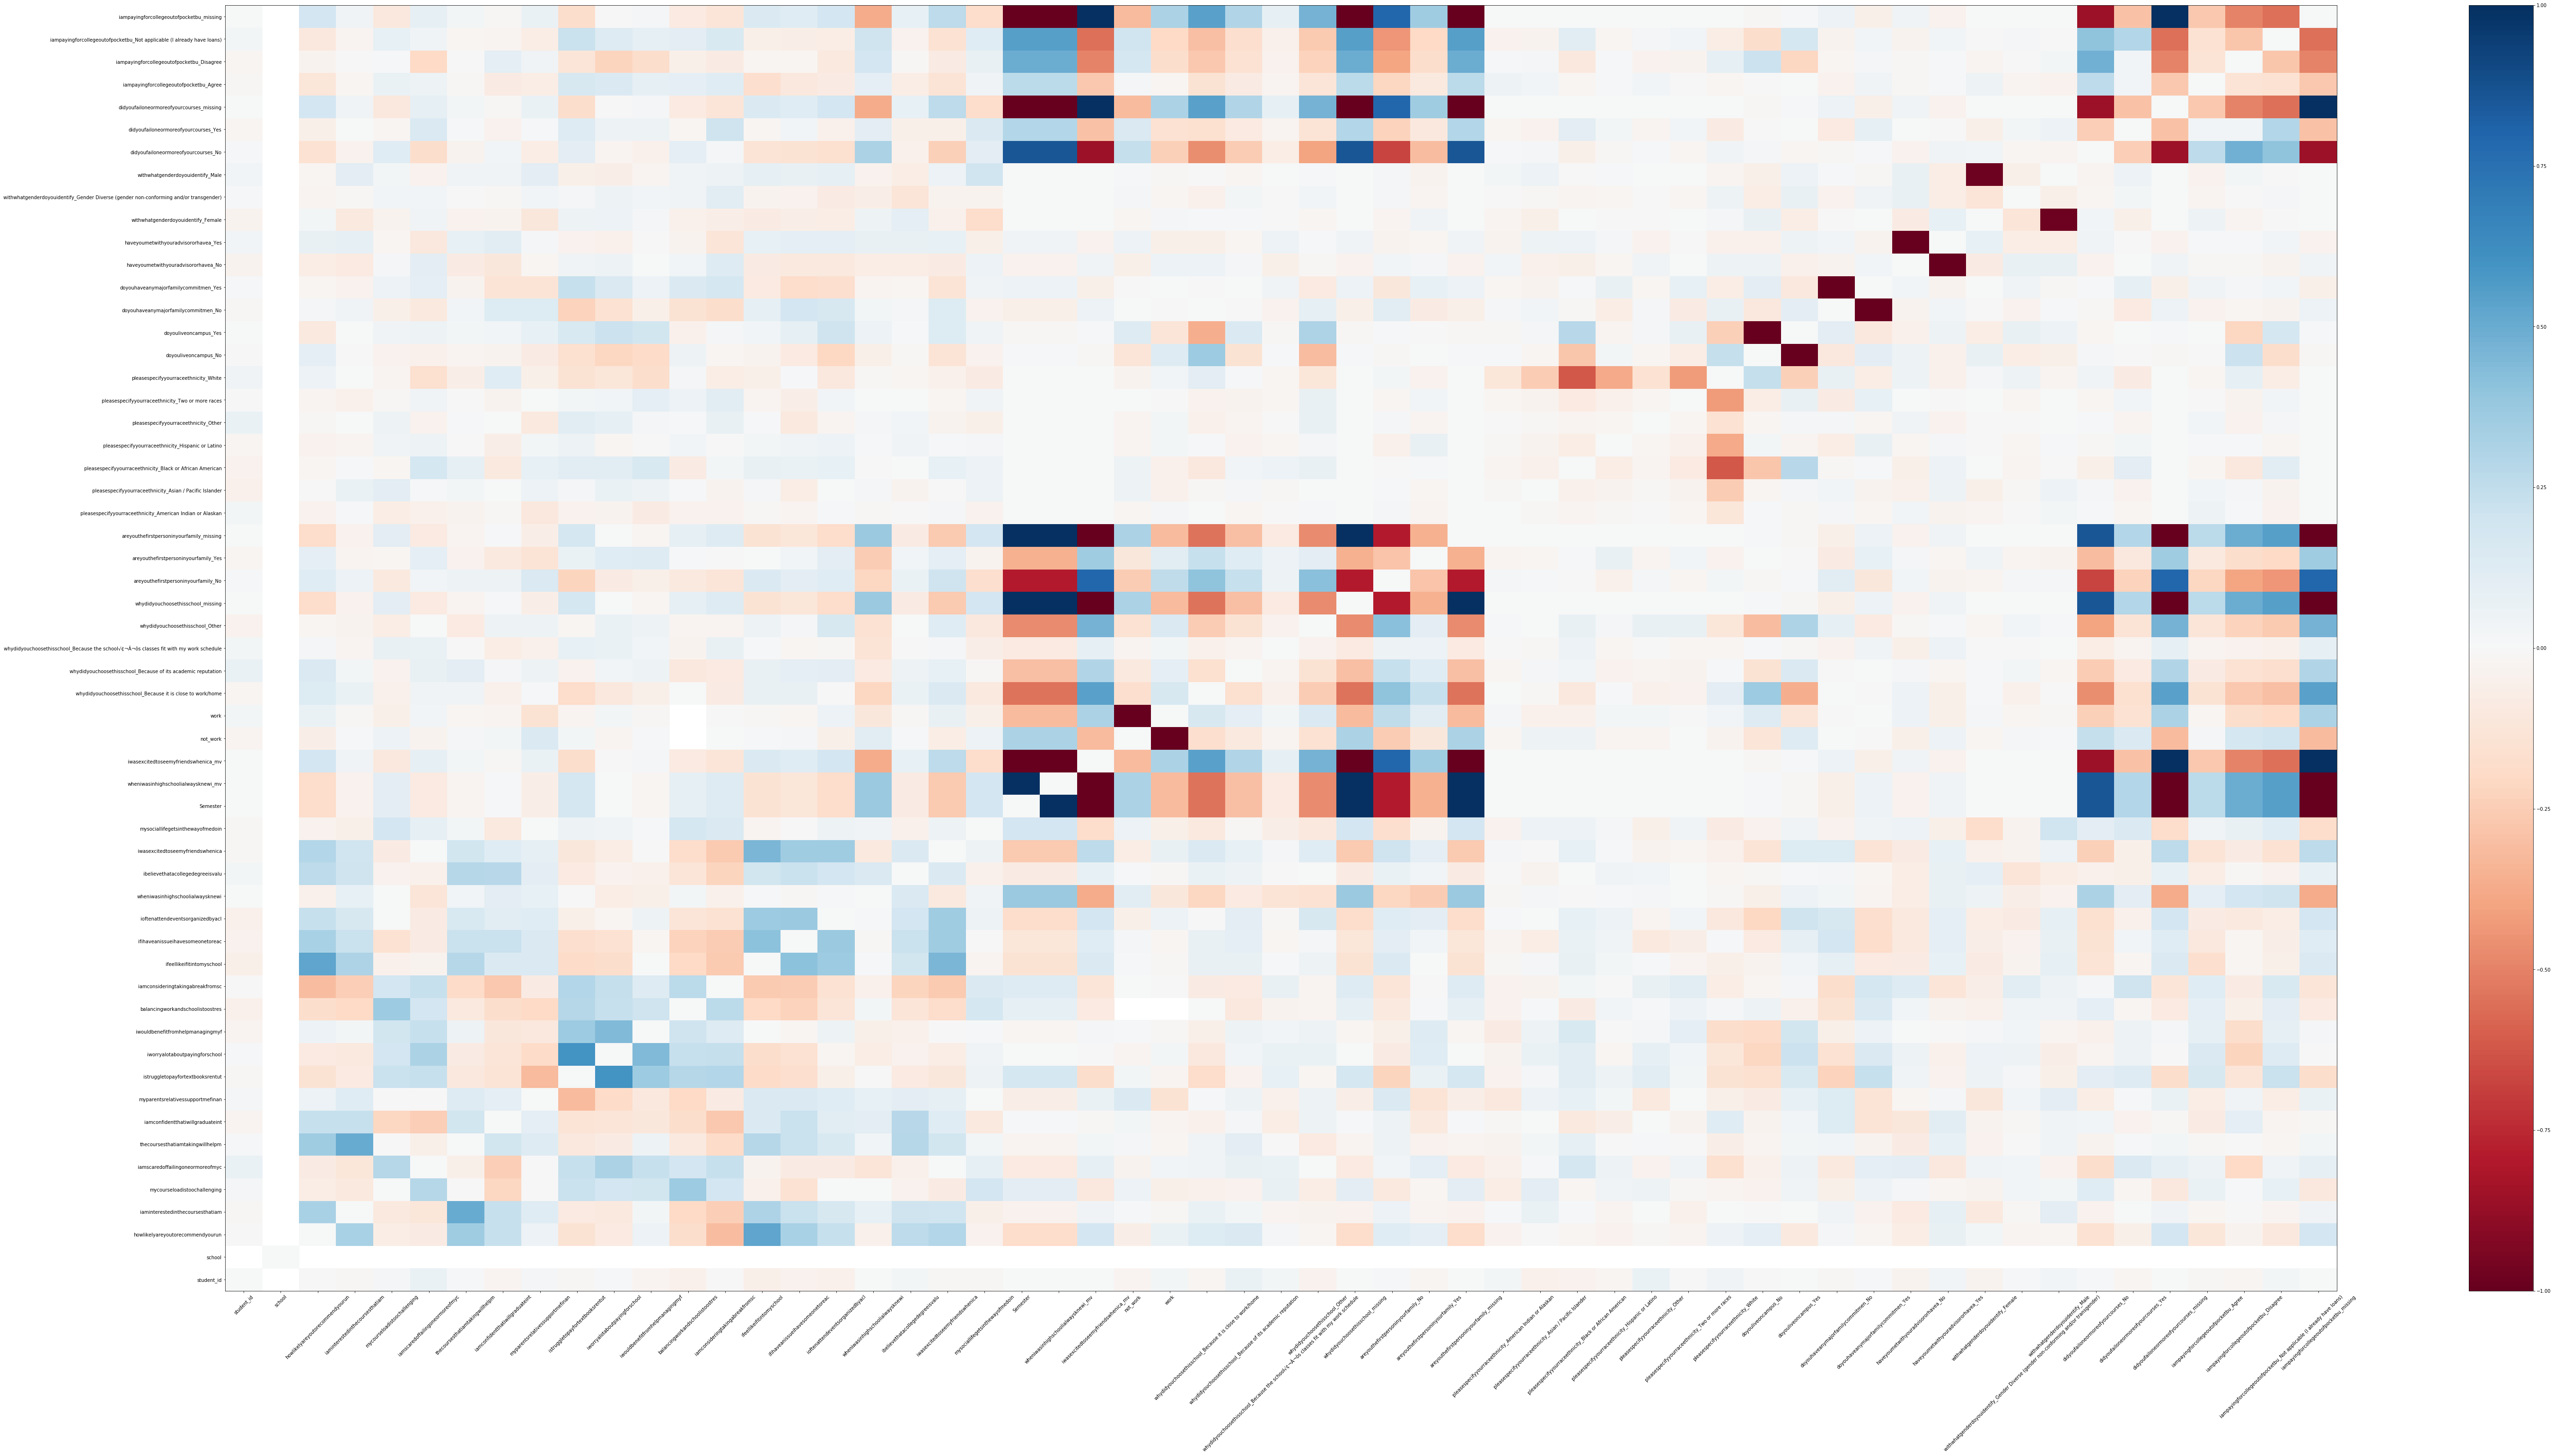

In [49]:
%matplotlib inline
import importlib
plotCorr(data, 'dropout', 100, 50)

In [349]:
data=data[data["Year"]=="2018"]

KeyError: 'Year'

In [136]:
# regular test, train, split (comment out everything underneath up to LR, Bernouilli, SVC, RF)
from sklearn.model_selection import train_test_split
X=data.drop("dropout",axis=1)
Y= data["dropout"]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, train_size=0.7)

In [189]:
# build training, testing set
id_rand =np.random.permutation(data.shape[0])
train_id = id_rand[:int(data.shape[0]*0.8)]
test_id=id_rand[int(data.shape[0]*0.8):]
train_df,test_df = data.iloc[train_id,:], data.iloc[test_id,:]

In [190]:
# sampling prep
count_class_1, count_class_0 = train_df.dropout.value_counts()
df_class_0 = train_df[train_df['dropout'] == 0]
df_class_1 = train_df[train_df['dropout'] == 1]

In [186]:
# oversampling (comment out undersampling)
df_class_0_over = df_class_0.sample(n=count_class_1, replace=True)
df_train = pd.concat([df_class_1, df_class_0_over], axis=0)

In [191]:
# undersampling (comment out oversampling)
df_class_1_under = df_class_1.sample(n=count_class_0)
df_train = pd.concat([df_class_1_under, df_class_0], axis=0)

In [192]:
# train,test,split
X_train = df_train.drop("dropout",axis=1)
Y_train=df_train['dropout']
X_test=test_df.drop("dropout",axis=1)
Y_test=test_df['dropout']

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


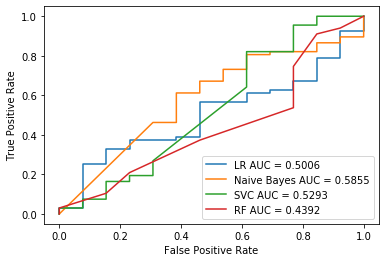

,Predicted Dropout,Predicted Non Dropout
Actual Dropout,7,6
Actual Non Dropout,42,25


In [227]:
# LR, NB, SVC, RF
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,Y_train)
y_pred=lr_classifier.predict(X_test)
mat_lr=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Dropout", "Actual Non Dropout"],columns=["Predicted Dropout", "Predicted Non Dropout"])
lr_pred_proba=lr_classifier.predict_proba(X_test)
lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(Y_test, lr_pred_proba[:,1])
lr_auc = metrics.auc(lr_fpr, lr_tpr)
plt.plot(lr_fpr, lr_tpr, label = 'LR AUC = %0.4f' %lr_auc)


from sklearn.naive_bayes import MultinomialNB
b_classifier = MultinomialNB()
b_classifier.fit(X_train,Y_train)
y_pred=b_classifier.predict(X_test)
mat_b=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Dropout", "Actual Non Dropout"],columns=["Predicted Dropout", "Predicted Non Dropout"])
b_pred_proba=b_classifier.predict_proba(X_test)
b_fpr, b_tpr, b_threshold = metrics.roc_curve(Y_test, b_pred_proba[:,1])
b_auc = metrics.auc(b_fpr, b_tpr)
plt.plot(b_fpr, b_tpr, label = 'Naive Bayes AUC = %0.4f' %b_auc)

from sklearn.svm import SVC
svc_classifier = SVC(probability=True)
svc_classifier.fit(X_train,Y_train)
y_pred=svc_classifier.predict(X_test)
mat_svc=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Dropout", "Actual Non Dropout"],columns=["Predicted Dropout", "Predicted Non Dropout"])
svc_pred_proba=svc_classifier.predict_proba(X_test)
svc_fpr, svc_tpr, svc_threshold = metrics.roc_curve(Y_test, svc_pred_proba[:,1])
svc_auc = metrics.auc(svc_fpr, svc_tpr)
plt.plot(svc_fpr, svc_tpr, label = 'SVC AUC = %0.4f' %svc_auc)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
mat_rf=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Dropout", "Actual Non Dropout"],columns=["Predicted Dropout", "Predicted Non Dropout"])
clf_pred_proba=clf.predict_proba(X_test)
clf_fpr, clf_tpr, clf_threshold = metrics.roc_curve(Y_test, clf_pred_proba[:,1])
clf_auc = metrics.auc(clf_fpr, clf_tpr)
plt.plot(clf_fpr, clf_tpr, label = 'RF AUC = %0.4f' %clf_auc)

plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

mat_rf

In [336]:
# Random Forest: shuffle, cross validation, undersampling

from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


def xValRF(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    recall = []
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(n=count_class_1)
        df_train = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train.drop("dropout",axis=1)
        Y_train= df_train['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        clf = RandomForestClassifier()
        clf.fit(X_train,Y_train)
        y_pred=clf.predict(X_test)
        mat_rf=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Non Dropout", "Actual Dropout"],columns=["Predicted Non Dropout", "Predicted Dropout"])
        clf_pred_proba=clf.predict_proba(X_test)
        clf_fpr, clf_tpr, clf_threshold = metrics.roc_curve(Y_test, clf_pred_proba[:,1])
        clf_auc = metrics.auc(clf_fpr, clf_tpr)
        plt.plot(clf_fpr, clf_tpr, label = 'RF AUC = %0.4f' %clf_auc)
        aucs.append(clf_auc)
        print(mat_rf)
        recall.append(recall_score(Y_test, y_pred, average='binary'))
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs,recall

In [337]:
# Support Vector Machine: shuffle, cross validation, undersampling

from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold


def xValSVC(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    recall=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(n=count_class_1)
        df_train = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train.drop("dropout",axis=1)
        Y_train= df_train['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        svc_classifier = SVC(probability=True)
        svc_classifier.fit(X_train,Y_train)
        y_pred=svc_classifier.predict(X_test)
        mat_svc=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Dropout", "Actual Non Dropout"],columns=["Predicted Dropout", "Predicted Non Dropout"])
        svc_pred_proba=svc_classifier.predict_proba(X_test)
        svc_fpr, svc_tpr, svc_threshold = metrics.roc_curve(Y_test, svc_pred_proba[:,1])
        svc_auc = metrics.auc(svc_fpr, svc_tpr)
        plt.plot(svc_fpr, svc_tpr, label = 'SVC AUC = %0.4f' %svc_auc)
        aucs.append(svc_auc)
        print(mat_lr)
        recall.append(recall_score(Y_test, y_pred, average='binary'))        
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs,recall

In [338]:
# Naive Bayes: shuffle, cross validation, undersampling
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold


def xValB(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    recall=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(n=count_class_1)
        df_train = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train.drop("dropout",axis=1)
        Y_train= df_train['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        b_classifier = MultinomialNB()
        b_classifier.fit(X_train,Y_train)
        y_pred=b_classifier.predict(X_test)
        mat_b=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Dropout", "Actual Non Dropout"],columns=["Predicted Dropout", "Predicted Non Dropout"])
        b_pred_proba=b_classifier.predict_proba(X_test)
        b_fpr, b_tpr, b_threshold = metrics.roc_curve(Y_test, b_pred_proba[:,1])
        b_auc = metrics.auc(b_fpr, b_tpr)
        plt.plot(b_fpr, b_tpr, label = 'Naive Bayes AUC = %0.4f' %b_auc)
        aucs.append(b_auc)
        print(mat_b)
        recall.append(recall_score(Y_test, y_pred, average='binary'))
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs,recall

In [339]:
# Logistic regression: shuffle, cross validation, undersampling
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold


def xValLR(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    recall=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(n=count_class_1)
        df_train = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train.drop("dropout",axis=1)
        Y_train= df_train['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        lr_classifier = LogisticRegression()
        lr_classifier.fit(X_train,Y_train)
        y_pred=lr_classifier.predict(X_test)
        mat_lr=pd.DataFrame(confusion_matrix(Y_test, y_pred),index=["Actual Dropout", "Actual Non Dropout"],columns=["Predicted Dropout", "Predicted Non Dropout"])
        lr_pred_proba=lr_classifier.predict_proba(X_test)
        lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(Y_test, lr_pred_proba[:,1])
        lr_auc = metrics.auc(lr_fpr, lr_tpr)
        plt.plot(lr_fpr, lr_tpr, label = 'LR AUC = %0.4f' %lr_auc)
        aucs.append(lr_auc)
        print(mat_lr)
        recall.append(recall_score(Y_test, y_pred, average='binary')) 
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs,recall

In [341]:
aucs_rf=xValRF(data, 5)
aucs_svc=xValSVC(data,5)
aucs_b=xValB(data,5)
aucs_lr=xValLR(data, 5)

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [226]:
# Mean of each classifier for each fold of cross validation
print(np.mean(aucs_rf[0]),np.mean(aucs_svc[0]),np.mean(aucs_b[0]),np.mean(aucs_lr[0]))
print(np.mean(aucs_rf[1]),np.mean(aucs_svc[1]),np.mean(aucs_b[1]),np.mean(aucs_lr[1]))
print(np.std(aucs_rf[0]),np.std(aucs_svc[0]),np.std(aucs_b[0]),np.std(aucs_lr[0]))
print(np.std(aucs_rf[1]),np.std(aucs_svc[1]),np.std(aucs_b[1]),np.std(aucs_lr[0]))

0.5947730077721415 0.5293462876565803 0.5782139918474457 0.6387750204739804
0.0505513211442911 0.05740345000143445 0.10831997005301901 0.06838857232346651


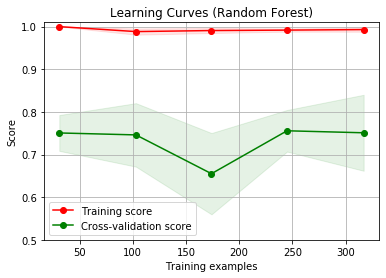

In [202]:
# Learning curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = data.drop("dropout",axis=1),data["dropout"]
title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, data.drop("dropout",axis=1),data["dropout"], ylim=(0.5, 1.01), cv=5, n_jobs=4)


plt.show()